In [1]:
import numpy as np
import matplotlib.pyplot as plt

def LJ_pot(r):
    '''This function calculates the value of the potential for two particle spaced by a distance r. Returns scalar
    value.'''
    U = 4*(r**(-12) - r**(-6))
    return U

def grad_LJ_pot(r):
    '''Calculates the derivative of the potential with respect to r.'''
    dU = 4*(6*r**(-7) - 12*r**(-13))
    return dU

def initial_conditions(density, temperature):
    '''Specifies the initial conditions for the positions of a 3x3x3 unit cell configuration of an fcc latice.'''
    
    particles = np.zeros((108,6))
    
    x = np.zeros((108))
    y = np.zeros((108))
    z = np.zeros((108))
    
    box_size = (108/density)**(1/3) # Box size
    
    l=-1 # Loop counter
    for i in range(3):
        for j in range(3):
            for k in range(3):
                l+=1
                # particle nr. 1
                particles[l,0]=0+box_size/3*i; particles[l,1]=0+box_size/3*j; particles[l,2]=0+box_size/3*k; # corner
                # particle nr. 2
                particles[l+27, 0]=box_size/6+box_size/3*i; particles[l+27, 1]=box_size/6+box_size/3*j; particles[l+27, 2]=0+box_size/3*k; # x-y plane
                # particle nr. 3
                particles[l+54,0]=box_size/6+box_size/3*i; particles[l+54,1]=0+box_size/3*j; particles[l+54,2]=box_size/6+box_size/3*k; # x-z plane
                # particle nr. 4
                particles[l+81,0]=0+box_size/3*i; particles[l+81,1]=box_size/6+box_size/3*j; particles[l+81,2]=box_size/6+box_size/3*k; # y-z plane
    

    
    vel_x = np.zeros((1,108))
    vel_y = np.zeros((1,108))
    vel_z = np.zeros((1,108))
    
    vel_x[0] = np.random.normal(0,np.sqrt(temperature),108)
    vel_y[0] = np.random.normal(0,np.sqrt(temperature),108)
    vel_z[0] = np.random.normal(0,np.sqrt(temperature),108)
    

    
    
    
    particles[:,3:] = np.array([vel_x,vel_y,vel_z]).reshape(108,3)
    
    return particles

In [5]:
def distance(positions, n,i,t): 
    '''By inputting coordinates, the index of particles and time, this function calculates the distances'''
    dr = np.zeros(3)
    
    for l in range(3):
        dr[l] = (positions[t,n, l] - positions[t,i,l] + length/2) % length - length/2
    
    
    r = np.sqrt(np.sum(np.power(dr,2)))
    
    return r,dr



def force(positions, n,t): 
    '''This function calculates the forces on the n-th particle along x-,y- and z-axis at time t'''
    forces_on_part = np.zeros((3))
    for i in range(108):
        if i!=n:
            r, dr = distance(positions, n,i,t)
            forces_on_part += -grad_LJ_pot(r) * dr/r
            # forces_on_part[1] += -grad_LJ_pot(r) * dr[1]/r
            # forces_on_part[2] += -grad_LJ_pot(r) * dr[2]/r
    return forces_on_part

def integration_eq_of_motion(timesteps,initial_particles):
    '''Outputs coordinates for velocity and position given the initial condition for the velocity and 
    position in the for of two 1x108 arrays (for eacht particle an initial condition).'''
    
    h=1e-3
    
    x = np.zeros((timesteps,108)); x[0,:]=initial_particles[:,0]
    y = np.zeros((timesteps,108)); y[0,:]=initial_particles[:,1]
    z = np.zeros((timesteps,108)); z[0,:]=initial_particles[:,2]
    
    positions = np.zeros((timesteps,108,3))
    velocities = np.zeros((timesteps,108,3))
    
    positions[0,:,:] = initial_particles[:,0:3]
    velocities[0,:,:] = initial_particles[:,3:]
    
    
    vel_x = np.zeros((timesteps,108)); vel_x[0,:]=initial_particles[:,3]
    vel_y = np.zeros((timesteps,108)); vel_y[0,:]=initial_particles[:,4]
    vel_z = np.zeros((timesteps,108)); vel_z[0,:]=initial_particles[:,5]
    
    forces_part =np.zeros((timesteps,108, 3))
    
    
    
    for i in range(108):
        forces_part[0,i,:] = force(positions, i, 0)
    for t in range(0,timesteps-1): 
        for i in range(108):
            positions[t+1,i, :] = (positions[t,i, :] + velocities[t,i,:]*h + forces_part[t,i, :]/2*h**2) % length
            # y[t+1,i] = (y[t,i] + vel_y[t,i]*h + F_y[t,i]/2*h**2) % length
            # z[t+1,i] = (z[t,i] + vel_z[t,i]*h + F_z[t,i]/2*h**2) % length
        
        for i in range(108):
            forces_part[t+1,i, :]=force(positions,i,t+1)
        
        for i in range(108):
            velocities[t+1,i, :] = (forces_part[t,i, :]+forces_part[t+1,i,:])*h/2 + velocities[t,i, :]
            # vel_y[t+1,i] = (F_y[t,i]+F_y[t+1,i])*h/2 + vel_y[t,i]
            # vel_z[t+1,i] = (F_z[t,i]+F_z[t+1,i])*h/2 + vel_z[t,i]
        print(t)
    return positions, velocities

def kinetic_energy(velocities):
    kin_en = 0.5*(np.sum(velocities**2))
    return kin_en

def relaxation(pressure, temperature):
    timesteps = 5
    iterations =20
    
    initial_particles = initial_conditions(pressure, temperature)
    
    
    for p in range(iterations):
        positions, velocities = integration_eq_of_motion(timesteps, initial_particles)
        kin_en = kinetic_energy(velocities[timesteps-1,:,:])
        lmbd = np.sqrt((107*3+temperature)/kin_en)
        initial_particles[:,:3] = positions[timesteps-1,:,:]
        initial_particles[:,3:] = lmbd*velocities[timesteps-1,:,:]
    
    return initial_particles
        
                       

0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3


(0.0, 5.12992784003009)

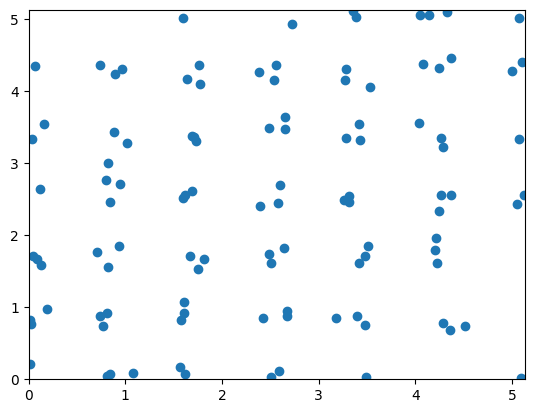

In [6]:
rho = 0.8
temperature = 1.0
box_size = (108/rho)**(1/3) 
length = box_size
relaxed_particles = relaxation(rho, temperature)

# print(particles[:,:3])

plt.scatter(relaxed_particles[:,0], relaxed_particles[:,1])
plt.xlim(0, box_size)
plt.ylim(0, box_size)

In [8]:



iterations = 500

positions, velocities = integration_eq_of_motion(iterations, relaxed_particles)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

(0.0, 5.12992784003009)

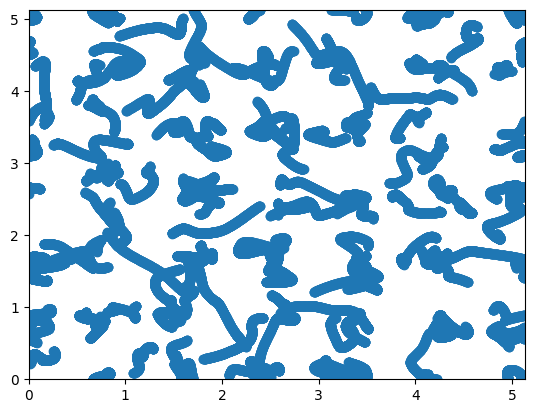

In [9]:
plt.scatter(positions[:,:,0], positions[:,:,1])

plt.xlim(0, box_size)
plt.ylim(0, box_size)

In [10]:
kinetic_energy = np.zeros(iterations)

for t in range(iterations):
    kinetic_energy[t] = 0.5*(np.sum(velocities[t,:,:]**2))

In [11]:
pot_energy = np.zeros(iterations)

for t in range(iterations):
    for i in range(108):
        potential = 0
        for j in range(108):
            if i != j:
                r, dr = distance(positions,j,i,t)
                potential += LJ_pot(r)
    if t%10 == 0:
        print(t)
    pot_energy[t] = potential

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


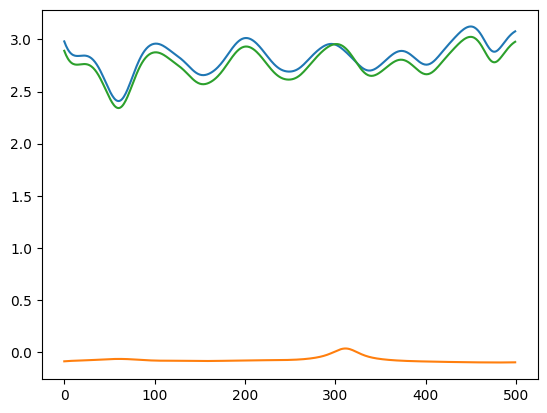

In [13]:
plt.plot(kinetic_energy/108)
plt.plot(pot_energy/108)
plt.plot(kinetic_energy/108 + pot_energy/108)